# KMeans Algorithm from scratch

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [9]:
#read dataset
def readDataset(file):
    return np.loadtxt('dataset.txt')

In [10]:
def euclidean_dist(x1y1, x2y2):
    return np.linalg.norm(x1y1-x2y2)

In [15]:
# kmeans algorithm
def kmeans(dataset, k=2, epsilion=0):
    num_samples, num_features = dataset.shape
    # choose two random points from dataset
    centeroids = dataset[np.random.randint(num_samples,size=k)]
    centeroids_old = np.zeros((k, num_features))
    #Initialize vector with zeros of length num_samples
    belongs_to = np.zeros((num_samples, 1))
    norm = euclidean_dist(centeroids, centeroids_old)
    iteration = 0
    while(norm > epsilion):
        iteration += 1
        norm = euclidean_dist(centeroids, centeroids_old)
        centeroids_old = centeroids
        for sample_index,row in enumerate(dataset):
            dist = np.zeros((k,1))
            for centeroid_index,centeroid in enumerate(centeroids):
                dist[centeroid_index] = euclidean_dist(row, centeroid)
            belongs_to[sample_index] = np.argmin(dist)

        centeroids_new = np.zeros((k,num_features))
        for centeroid_index in range(0,k):
            close = [i for i,b in enumerate(belongs_to) if b == centeroid_index]
            centeroids_new[centeroid_index, :] = np.mean(dataset[close], axis=0)
        centeroids = centeroids_new
        
    return centeroids,belongs_to, iteration

In [17]:
dataset = readDataset('dataset.txt')
centeroids, belongs_to, iterations = kmeans(dataset, 2, 0)

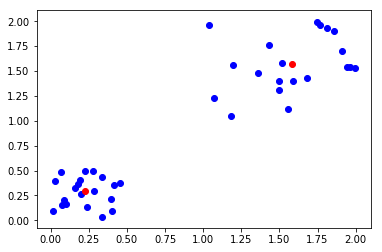

In [18]:
plt.scatter([x[0] for x in dataset], [x[1] for x in dataset], color='b')
plt.scatter([x[0] for x in centeroids], [x[1] for x in centeroids], color='r')